<a href="https://colab.research.google.com/github/rajatlamsal00977/Project-1/blob/main/lastproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#to import the required packages
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pa
import math


%matplotlib inline

We will be considering the first order linear differential equation
$$
\frac{dy}{dx} = f(x,y) \quad\quad y(x_0)=y_0
$$
  

Lets take a look at the equation,
$$
\frac{dy}{dx} = \sin x\left(1-y\right)\quad\quad y(0) = 2
$$
Here the solution should be in the form,
$$
y(x) = 1+ e^{\cos x-1}
$$
if we take $y(0) = 2$ and then It will take the following form
$$
y'(x) = -\sin x e^{\cos x -1}
$$


In [10]:
f = lambda x,y: np.sin(x)*(1-y)# this is my righthand side of the diff eq
g = lambda x: 1+math.e**(np.cos(x)-1) #this is the analytic solution
t = np.linspace(0, 50, 1000) #this is the interval I'll look at the solution for



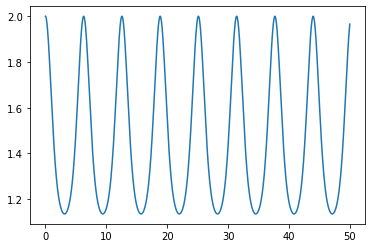

In [3]:
plt.plot(t, g(t))

**Euler's Method**

First lets approximate the solution by computing next value using
$$
y_{i+1} = y_i + f(x_i,y_i)h
$$
for h the step size, $h = x_{i+1}-x_i$.

In [4]:
def eulerMethod(function,initialValue,intervalForSolution):
  array = []
  y=initialValue
  h = intervalForSolution[1]-intervalForSolution[0]
  for i in intervalForSolution:
    array.append([y])
    y = y + f(i,y)*h
  return np.array(array)




In [5]:
mysol = eulerMethod(f,2,t)


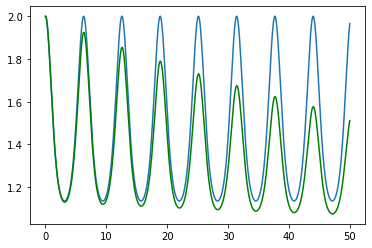

In [6]:
plt.plot(t, g(t))
plt.plot(t, mysol,'g')

As in Euler's method we will utilize another method here for the form of $\frac{dy}{dx}= f(x,y)$.  We will be given an initial point and iterate to the next point using
$$
y_{i+1} = y_i + \frac h6 \left( k_1+2k_2+2k_3+k_4\right)
$$
where 
$$
\begin{align}
&k_1 = f(x_i,y_i)\\
&k_2 = f\left(x_i+\frac h2,y_i+\frac {k_1h}2\right)\\
&k_3 = f\left(x_i+\frac h 2,y_i +\frac{k_2 h}2\right)\\
&k_4 = f\left(x_i+h,y_i +k_3 h\right)
\end{align}
$$

In [7]:
def rungeKutta(function, initialValue, intervalForSolution):
  h = intervalForSolution[1]-intervalForSolution[0]
  y = initialValue
  sol = []
  for i in intervalForSolution:
    sol.append([y])
    k1 = function(i,y)
    k2 = function(i+h/2,y+k1*h/2)
    k3 = function(i+ h/2,y+k2*h/2)
    k4 = function(i+ h , y+k3*h)
    y = y+h/6*(k1+2*k2+2*k3+k4)
  return np.array(sol)

In [8]:
rsol = rungeKutta(f,2,t)

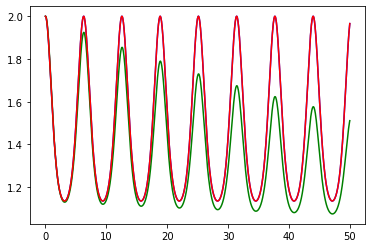

In [9]:
plt.plot(t, g(t),'b')
plt.plot(t, mysol,'g')
plt.plot(t,rsol,'r')